In [1]:
#reading csv file
#reading myData
import zipfile
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

#loading csv file from zip
archive = zipfile.ZipFile('/home/carnd/simulation_data/allDataFinal.zip', 'r')
csvFile = archive.open('driving_log.csv')


lines=[] #reading csv files
y=[] #the output for the steering angle
X=[] #list for image output
#reading csv file
csvReader = pd.read_csv(csvFile, header=None)# the myData.zip file does not use headers
correction = 0.2

for line in csvReader.iterrows():
    lines.append(line[1])
    '''
    center_img = archive.open('IMG/' + line[1][0].split('IMG\\')[-1])
    center_img = plt.imread(center_img) 
    
    left_img = archive.open('IMG/' + line[1][1].split('IMG\\')[1])
    left_img = plt.imread(left_img)
    
    right_img = archive.open('IMG/' + line[1][2].split('IMG\\')[1])
    right_img = plt.imread(right_img)
    
    #X.append(np.concatenate((center_img, left_img, right_img),axis=2)) #creating a 9 channel input to be used by the network 
    X.append(center_img)
    y.append(float(line[1][3]))
    
    X.append(left_img)
    y.append((float(line[1][3])+correction))
    
    X.append(right_img)
    y.append((float(line[1][3])-correction))
    
img_shape = X[0].shape

#convert inputs and outputs to numpy array for keras
X_train=np.array(X)
y_train=np.array(y)
'''
img_shape = plt.imread(archive.open('IMG/' + lines[0][0].split('IMG\\')[-1])).shape
#train_samples, validation_samples = train_test_split(lines, test_size=0.2)

In [2]:
ranges = np.zeros(10, np.int16)

for line in lines:
    steering = line[3]
    for i in range(0,10):
        if(steering>(1-0.2*(i+1)) and steering<(1-0.2*i)):
            ranges[i]= ranges[i]+1
            break

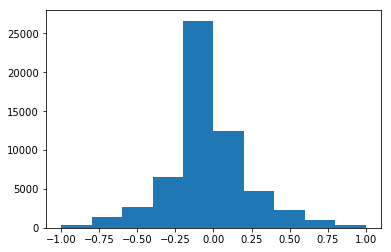

In [3]:
plt.bar(np.linspace(0.9,-0.9,10),ranges, 0.2)
plt.show()

In [4]:
import random


for i in reversed(range(len(lines))):
    steering = float(lines[i][3])
    if(steering>0 and steering<0.2):
        keep_probs = random.random();
        if(keep_probs>0.45):
            del lines[i] 
    elif(steering>-0.2 and steering<=0):
        keep_probs = random.random();
        if(keep_probs>0.22):
            del lines[i] 
    elif(steering>-0.4 and steering<=-0.2):
        keep_probs = random.random();
        if(keep_probs>0.8):
            del lines[i] 
    elif(steering<-0.8 or steering>0.8):
        for j in range(8):
            lines.append(lines[i])
    elif(steering<-0.6 or steering>0.6):
        for j in range(2):
            lines.append(lines[i])
    elif(steering<-0.5 or steering>0.5):
        for j in range(2):
            lines.append(lines[i])
            

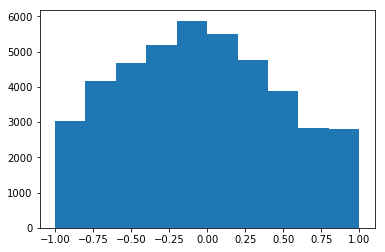

In [5]:
ranges = np.zeros(10, np.int16)

for line in lines:
    steering = line[3]
    for i in range(0,10):
        if(steering>(1-0.2*(i+1)) and steering<(1-0.2*i)):
            ranges[i]= ranges[i]+1
            break
plt.bar(np.linspace(0.9,-0.9,10),ranges, 0.2)
plt.show()

In [6]:
lines = shuffle(lines)
train_samples, validation_samples = train_test_split(lines, test_size=0.2)

In [ ]:
print(len(train_samples), len(validation_samples))

In [ ]:
dir0 = 'IMG/' + lines[0][0].split('IMG')[-1]
if dir0 in archive.namelist():
    print('yes')
#print(archive.namelist())

In [7]:
#generator for myData

#utilizing generators for reading data
def generator(archive_in, samples, batch_size=32, augment=False):
    num_samples = len(samples)
    while 1: # Loop forever so the generator never terminates
        shuffle(samples)
        for offset in range(0, num_samples, batch_size):
        
            if(augment):
                batch_samples = samples[offset:offset+math.ceil(batch_size/2)]
            else:
                batch_samples = samples[offset:offset+batch_size]
            images = []
            angles = []
            #loading files
            for batch_sample in batch_samples:
                dir1 = 'IMG/' + batch_sample[0].split('IMG\\')[-1]
                dir2 = 'IMG/' + batch_sample[0].split('IMG/')[-1]
                if dir1 in archive.namelist():
                    name =  archive_in.open(dir1)
                elif dir2 in archive.namelist():
                    name =  archive_in.open(dir2)
                center_image = plt.imread(name)
                center_angle = float(batch_sample[3])
                images.append(center_image)
                angles.append(center_angle)
                '''
                dir1 = 'IMG/' + batch_sample[1].split('IMG\\')[-1]
                dir2 = 'IMG/' + batch_sample[1].split('IMG/')[-1]
                if dir1 in archive.namelist():
                    name =  archive_in.open(dir1)
                elif dir2 in archive.namelist():
                    name =  archive_in.open(dir2)
                left_image = plt.imread(name)
                left_angle = float(batch_sample[3]) + correction
                images.append(left_image)
                angles.append(left_angle)
                
                dir1 = 'IMG/' + batch_sample[2].split('IMG\\')[-1]
                dir2 = 'IMG/' + batch_sample[2].split('IMG/')[-1]
                if dir1 in archive.namelist():
                    name =  archive_in.open(dir1)
                elif dir2 in archive.namelist():
                    name =  archive_in.open(dir2)
                right_image = plt.imread(name)
                right_angle = float(batch_sample[3]) - correction
                images.append(right_image)
                angles.append(right_angle)
                 ''' 
                if(augment):
                    images.append(np.fliplr(center_image))
                    angles.append(-center_angle)
                    '''
                    images.append(np.fliplr(left_image))
                    angles.append(-left_angle)
                
                    images.append(np.fliplr(right_image))
                    angles.append(-right_angle)
                    '''
            # trim image to only see section with road
            X_train = np.array(images)
            y_train = np.array(angles)
            yield shuffle(X_train, y_train)

In [ ]:
#reading csv file
#reading provided data
import zipfile
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

#loading csv file from zip
archive = zipfile.ZipFile('/home/carnd/simulation_data/data.zip', 'r')
csvFile = archive.open('data/driving_log.csv')


lines=[] #reading csv files
y=[] #the output for the steering angle
X=[] #list for image output
#reading csv file
csvReader = pd.read_csv(csvFile)# the data.zip file uses headers
correction = 0.3

for line in csvReader.iterrows():
    lines.append(line[1])
    '''
    center_img = archive.open('data/IMG/' + line[1][0].split('IMG/')[-1])
    center_img = plt.imread(center_img) 
    
    left_img = archive.open('data/IMG/' + line[1][1].split('IMG/')[1])
    left_img = plt.imread(left_img)
    
    right_img = archive.open('data/IMG/' + line[1][2].split('IMG/')[1])
    right_img = plt.imread(right_img)
    
    #X.append(np.concatenate((center_img, left_img, right_img),axis=2)) #creating a 9 channel input to be used by the network 
    X.append(center_img)
    y.append(float(line[1][3]))
    
    
    X.append(left_img)
    y.append((float(line[1][3])+correction))
    
    X.append(right_img)
    y.append((float(line[1][3])-correction))
    
    
img_shape = X[0].shape

#convert inputs and outputs to numpy array for keras
X_train=np.array(X)
y_train=np.array(y)
'''
train_samples, validation_samples = train_test_split(lines, test_size=0.2)
img_shape = plt.imread(archive.open('data/IMG/' + lines[0][0].split('IMG/')[-1])).shape

In [ ]:
#utilizing generators for reading data
def generator(archive_in, samples, batch_size=32, augment=False):
    num_samples = len(samples)
    while 1: # Loop forever so the generator never terminates
        shuffle(samples)
        for offset in range(0, num_samples, batch_size):
            if(augment):
                batch_samples = samples[offset:offset+math.ceil(batch_size/2)]
            else:
                batch_samples = samples[offset:offset+batch_size]

            images = []
            angles = []
            #loading files
            for batch_sample in batch_samples:
                name =  archive_in.open('data/IMG/' + batch_sample[0].split('IMG/')[-1])
                center_image = plt.imread(name)
                center_angle = float(batch_sample[3])
                images.append(center_image)
                angles.append(center_angle)
                
                name =  archive_in.open('data/IMG/' + batch_sample[1].split('IMG/')[-1])
                left_image = plt.imread(name)
                left_angle = float(batch_sample[3]) + correction
                images.append(left_image)
                angles.append(left_angle)
                
                name =  archive_in.open('data/IMG/' + batch_sample[2].split('IMG/')[-1])
                right_image = plt.imread(name)
                right_angle = float(batch_sample[3]) - correction
                images.append(right_image)
                angles.append(right_angle)
              
                if(augment):
                    images.append(np.fliplr(center_image))
                    angles.append(-center_angle)
                
                    images.append(np.fliplr(left_image))
                    angles.append(-left_angle)
                
                    images.append(np.fliplr(right_image))
                    angles.append(-right_angle)
                

            # trim image to only see section with road
            X_train = np.array(images)
            y_train = np.array(angles)
            yield shuffle(X_train, y_train)

In [ ]:
#augmenting data by flipping
X_flipped = np.fliplr(X_train)
y_flipped = -y_train

X_train = np.concatenate((X_train, X_flipped), axis=0)
y_train = np.concatenate((y_train, y_flipped), axis=0)

In [ ]:
#shuffling data
from sklearn.utils import shuffle

X_train, y_train = shuffle(X_train, y_train)
X_train, y_train = shuffle(X_train, y_train)
X_train, y_train = shuffle(X_train, y_train)
X_train, y_train = shuffle(X_train, y_train)
X_train, y_train = shuffle(X_train, y_train)

In [ ]:
#Create & define NN model using keras
import tensorflow as tf
from keras.layers import Activation, Dense, Convolution2D, Dropout, Flatten, MaxPooling2D, Input, Merge, Lambda
from keras.models import Model
from keras.layers.convolutional import Cropping2D


train_generator = generator(archive, train_samples, batch_size=35, augment=True)
validation_generator = generator(archive, validation_samples, batch_size=35, augment=True)

inp = Input(shape=img_shape)
#gray = Lambda(lambda x: (0.21 * x[:,:,:,:1]) + (0.72 * x[:,:,:,1:2]) + (0.07 * x[:,:,:,-1:]))(inp)
norm = Lambda(lambda x: np.divide(x - 127.5, 127.5))(inp)
crop = Cropping2D(cropping=((50, 20), (0, 0)))(norm)
c1 = Convolution2D(3, nb_row=5, nb_col=5, subsample=(1,1), border_mode='same')(crop)
c1p = MaxPooling2D(pool_size=(2, 2))(c1)
c1a = Activation('relu')(c1p)
c2 = Convolution2D(24, nb_row=5, nb_col=5, subsample=(1,1), border_mode='same')(c1)
c2p = MaxPooling2D(pool_size=(2, 2))(c2)
c2a = Activation('relu')(c2p)
c3 = Convolution2D(36, nb_row=5, nb_col=5, subsample=(1,1), border_mode='same')(c2a)
c3p = MaxPooling2D(pool_size=(2, 2))(c3)
c3a = Activation('relu')(c3p) 
c4 = Convolution2D(48, nb_row=5, nb_col=5, subsample=(1,1), border_mode='same')(c3a)
c4p = MaxPooling2D(pool_size=(2, 2))(c4)
c4a = Activation('relu')(c4p)
c5 = Convolution2D(64, nb_row=3, nb_col=3, subsample=(1,1), border_mode='same')(c4a)
c5p = MaxPooling2D(pool_size=(2, 2))(c5)
c5a = Activation('relu')(c5p)
c6 = Convolution2D(64, nb_row=3, nb_col=3, subsample=(1,1), border_mode='same')(c5a)
c6p = MaxPooling2D(pool_size=(2, 2))(c6)
c6a = Activation('relu')(c6p) 
#c7 = Convolution2D(64, nb_row=3, nb_col=3, subsample=(1,1), border_mode='same')(c6a)
#c7p = MaxPooling2D(pool_size=(2, 2))(c7)
#c7a = Activation('relu')(c7p) 

#flatc2 = Flatten()(c2a)
#flatc3 = Flatten()(c3a)
flatc5 = Flatten()(c5a)
flatc6 = Flatten()(c6a)
#flatc7 = Flatten()(c7a)
flat = Merge(mode='concat')([flatc5, flatc6])

f1 = Dense(1064)(flat)
f1a = Activation('relu')(f1)
f1d = Dropout(0.5)(f1a)
f2 = Dense(100)(f1d)
f2a = Activation('relu')(f2)
f2d = Dropout(0.5)(f2a)
f3 = Dense(50)(f2d)
f3a = Activation('relu')(f3)
f3d = Dropout(0.5)(f3a)
out = Dense(1)(f3d)
         
model = Model(inp, out)


Using TensorFlow backend.


In [ ]:
#Create & define NN model using keras - Sequential approach
'''
import tensorflow as tf
from keras.layers import Activation, Dense, Convolution2D, Dropout, Flatten, MaxPooling2D, Input, Merge, Lambda
from keras.models import Sequential

model = Sequential()
#model.add(Lambda(lambda x: (0.21 * x[:,:,:,:1]) + (0.72 * x[:,:,:,1:2]) + (0.07 * x[:,:,:,-1:])))
model.add(Lambda(lambda x: np.divide(x - 128, 128), input_shape=img_shape))
model.add(Convolution2D(16, nb_row=3, nb_col=3, subsample=(2,2)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Activation('relu'))
model.add(Convolution2D(32, nb_row=3, nb_col=3, subsample=(2,2)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Activation('relu'))
model.add(Flatten())
model.add(Dense(1000))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(100))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
'''


In [ ]:
print(train_generator)


In [ ]:
#train NN model

model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])

model.fit(train_generator, validation_generator, nb_epoch=10, batch_size=128, validation_split=0.2, shuffle=True)

In [ ]:
#train the NN generator model

model.compile(loss='mse', optimizer='adam')

model.fit_generator(train_generator, samples_per_epoch= len(train_samples), validation_data=validation_generator, nb_val_samples=len(validation_samples), nb_epoch=7)


Epoch 1/7
43452/43467 [============================>.] - ETA: 0s - loss: 0.1465

/home/carnd/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/keras/engine/training.py:1569: UserWarning: Epoch comprised more than `samples_per_epoch` samples, which might affect learning results. Set `samples_per_epoch` correctly to avoid this warning.
  warnings.warn('Epoch comprised more than '


43488/43467 [==============================] - 523s - loss: 0.1465 - val_loss: 0.1024
Epoch 2/7
43488/43467 [==============================] - 509s - loss: 0.1049 - val_loss: 0.0765
Epoch 3/7
43488/43467 [==============================] - 496s - loss: 0.0913 - val_loss: 0.0704
Epoch 4/7
43488/43467 [==============================] - 502s - loss: 0.0842 - val_loss: 0.0606
Epoch 5/7
43488/43467 [==============================] - 505s - loss: 0.0738 - val_loss: 0.0573
Epoch 6/7
43488/43467 [==============================] - 501s - loss: 0.0710 - val_loss: 0.0523
Epoch 7/7
43488/43467 [==============================] - 503s - loss: 0.0634 - val_loss: 0.0455


In [ ]:
#saving the model for future use
model.save('modelfinal5.h5')

In [ ]:
print('what')